In [52]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [53]:
# Path of the file to read
filepath = "./data/home-data-for-ml-course/train.csv"

# Read the file into a variable fifa_data
# df = pd.read_csv(filepath, index_col="Date", parse_dates=True)
df = pd.read_csv(filepath)

In [54]:
for col, dtype in zip(df.columns, df.dtypes):
    print(f"{col:20}: {dtype}")

Id                  : int64
MSSubClass          : int64
MSZoning            : object
LotFrontage         : float64
LotArea             : int64
Street              : object
Alley               : object
LotShape            : object
LandContour         : object
Utilities           : object
LotConfig           : object
LandSlope           : object
Neighborhood        : object
Condition1          : object
Condition2          : object
BldgType            : object
HouseStyle          : object
OverallQual         : int64
OverallCond         : int64
YearBuilt           : int64
YearRemodAdd        : int64
RoofStyle           : object
RoofMatl            : object
Exterior1st         : object
Exterior2nd         : object
MasVnrType          : object
MasVnrArea          : float64
ExterQual           : object
ExterCond           : object
Foundation          : object
BsmtQual            : object
BsmtCond            : object
BsmtExposure        : object
BsmtFinType1        : object
BsmtFinSF1         

<Axes: title={'center': 'Area vs YearBuilt'}, xlabel='YearBuilt', ylabel='LotArea'>

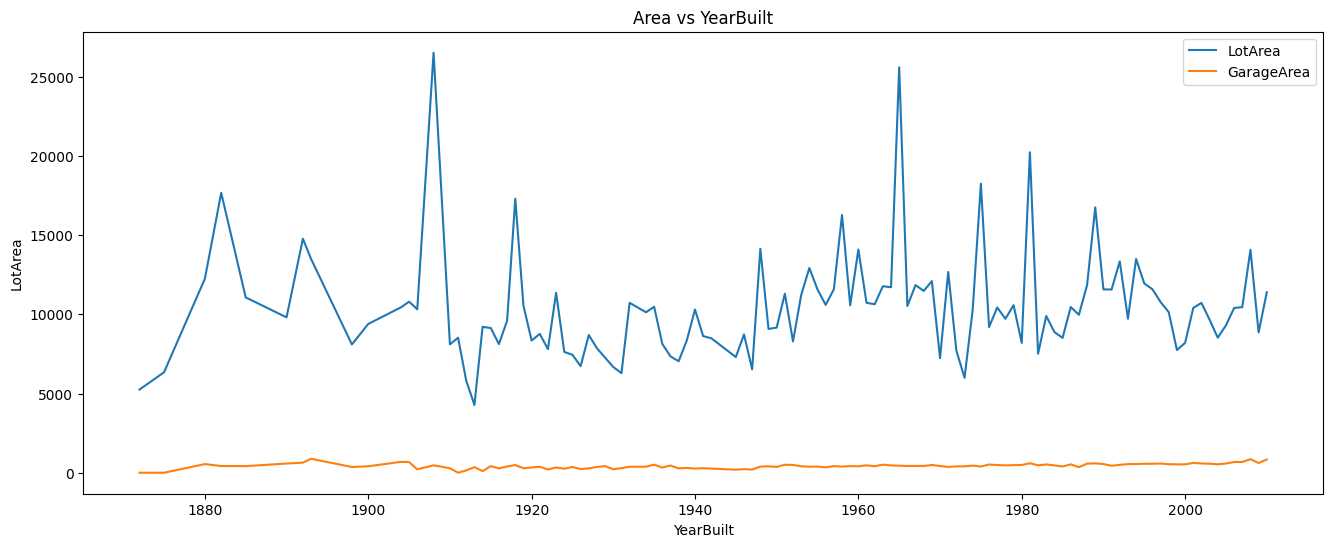

In [78]:
# Line plot - Area vs year built
grouped = df.loc[:, ["YearBuilt", "LotArea", "GarageArea"]]\
    .groupby(["YearBuilt"])\
    .mean()
plt.figure(figsize=(16,6))
plt.title("Area vs YearBuilt")
plt.xlabel("YearBuilt")
sns.lineplot(data=grouped["LotArea"], label="LotArea")
sns.lineplot(data=grouped["GarageArea"], label="GarageArea")

<Axes: title={'center': 'Number of houses built by year'}, xlabel='YearBuilt', ylabel='Number of houses'>

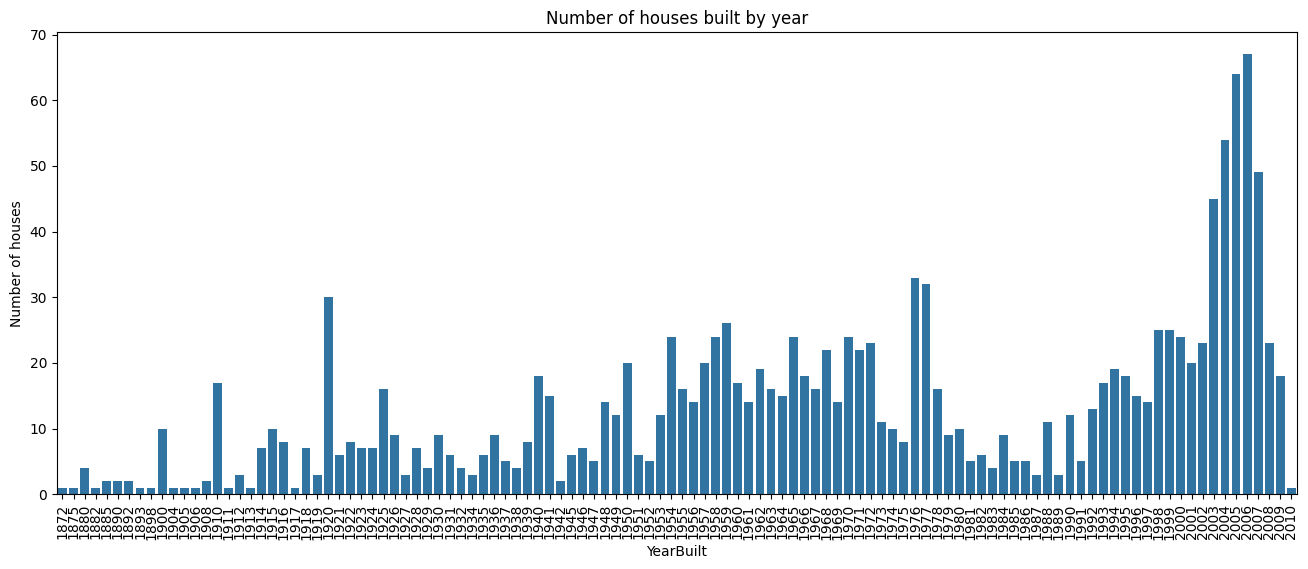

In [79]:
# Bar plot - number of houses by year
grouped = df.loc[:, ["Id", "YearBuilt"]]\
    .groupby(["YearBuilt"])\
    .count()
grouped.head()
plt.figure(figsize=(16,6))
plt.xticks(rotation=90)
plt.title("Number of houses built by year")
plt.xlabel("YearBuilt")
plt.ylabel("Number of houses")
sns.barplot(x=grouped.index, y=grouped["Id"])

<Axes: title={'center': 'Average Lot Area for each HouseStyle and LotConfig'}, xlabel='None-MSZoning', ylabel='HouseStyle'>

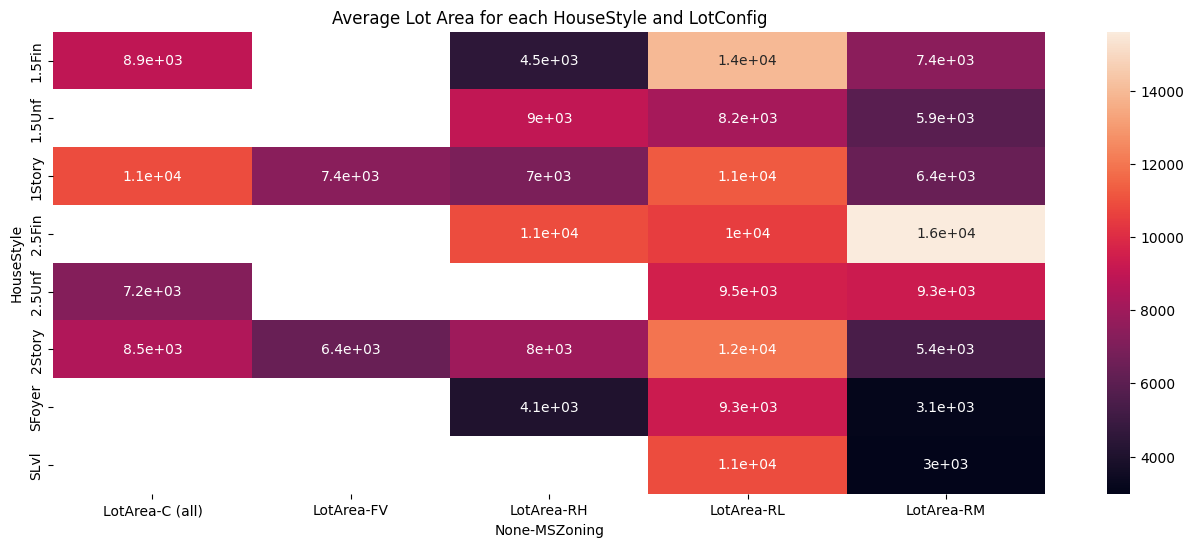

In [156]:
# Heat map
col_value = "LotArea"
col_idx = "HouseStyle"
col_col = "MSZoning"

grouped = df.loc[:, [col_value, col_idx, col_col]]\
    .groupby([col_idx, col_col])\
    .mean()\
    .reset_index()\
    .pivot(index=[col_idx],columns=[col_col], values=[col_value])
plt.figure(figsize=(16,6))
plt.title("Average Lot Area for each HouseStyle and LotConfig")
sns.heatmap(data=grouped, annot=True)